In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import missingno as msno

warnings.filterwarnings(action='ignore')

import matplotlib.font_manager as fm
path = 'DATA/font/NanumGothic-ExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [11]:
cks_dtype = {'clnt_id':'int64',
             'sess_id':'int64',
             'hit_seq':'int64',
             'action_type':'int64',
             'biz_unit':'category',
             'sess_dt':'object',
             'hit_tm':'object',
             'hit_pss_tm':'int64',
             'trans_id':'float64',
             'sech_kwd':'object',
             'tot_pag_view_ct':'float64',
             'tot_sess_hr_v':'float64',
             'trfc_src':'category',
             'dvc_ctg_nm':'category',
             'pd_c':'float64',
             'de_dt':'object',
             'de_tm':'object',
             'buy_am':'int64',
             'buy_ct':'int64',
             'clnt_gender':'category',
             'clnt_age':'float64'}

In [12]:
online = pd.read_csv('./DATA/raw1_add_act_kwd.csv')
trade = pd.read_csv('./DATA/거래 정보(CKS).csv', dtype=cks_dtype)
customer = pd.read_csv('./DATA/고객 정보(CKS).csv', dtype=cks_dtype)
item = pd.read_csv('./DATA/상품분류 정보(CKS).csv', dtype=cks_dtype)

In [14]:
online.head()

,Unnamed: 0,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,act_kwd
0,0,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,14.0,124.0,unknown,mobile_app,과일선물세트
1,1,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,14.0,124.0,unknown,mobile_app,과일선물세트 백화점
2,2,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,14.0,124.0,unknown,mobile_app,과일바구니
3,3,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,45.0,424.0,unknown,mobile_app,초등가을잠바
4,4,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,45.0,424.0,unknown,mobile_app,초등가을점퍼


<AxesSubplot:>

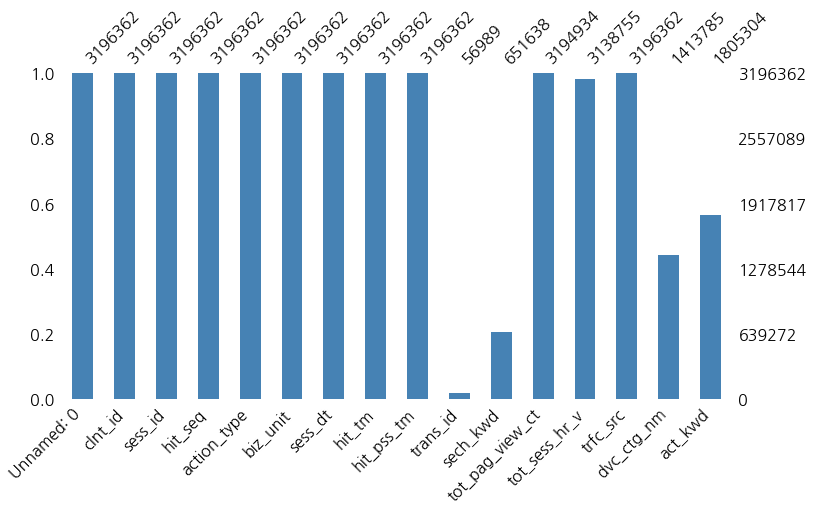

In [27]:
msno.bar(online, figsize=(12,6), color='steelblue')

In [17]:
csv_path=os.getenv("HOME") + ('/repo/Hackathon/Lpoint Competition/csv/')
papago = pd.read_csv(csv_path+ 'papago.csv', header=None)
item['clac_nm3'] = papago[0]
item.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,자동차 오일/첨가물
1,2.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,카 라이트
2,3.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,카 페인트
3,4.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,필터
4,5.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,와이퍼 블레이드


In [24]:
trade.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,2,42449.0,1,A02,1015.0,20190704,15:34,46430,1
1,2,62037.0,1,A03,92.0,20190729,23:47,36000,20
2,2,64691.0,1,A03,186.0,20190731,21:25,3790,1
3,2,64691.0,2,A03,151.0,20190731,21:25,3990,1
4,2,64691.0,3,A03,351.0,20190731,21:25,4690,1


In [18]:
online_col = ['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'hit_pss_tm', 'trans_id', 'act_kwd', 'tot_pag_view_ct', 'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm']
trade_col = ['trans_id', 'biz_unit', 'pd_c', 'de_dt','de_tm', 'buy_am', 'buy_ct']
customer_col = ['clnt_id', 'clnt_gender', 'clnt_age']
item_col = ['pd_c', 'clac_nm3']

In [36]:
on_tr = pd.merge(online[online_col], trade[trade_col], on='trans_id')
on_tr_cu = pd.merge(on_tr, customer[customer_col], on='clnt_id')
df_data = pd.merge(on_tr_cu, item[item_col], on='pd_c')

df_data= df_data.drop(['sess_id', 'trans_id', 'biz_unit', 'hit_seq', 'de_tm'], axis = 1)
df_data

,clnt_id,action_type,hit_pss_tm,act_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,pd_c,de_dt,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm3
0,2,6,791905,레쓰비,55.0,872.0,DIRECT,NaN,92.0,20190729,36000,20,F,30.0,커피 음료
1,2,6,3251794,다진소고기,85.0,3256.0,DIRECT,NaN,92.0,20190731,1800,1,F,30.0,커피 음료
2,2,6,306944,레쓰비175,23.0,353.0,DIRECT,NaN,92.0,20190801,9000,5,F,30.0,커피 음료
3,202,6,3133410,NaN,73.0,3174.0,DIRECT,NaN,92.0,20190818,1000,1,M,40.0,커피 음료
4,202,6,1015069,결명자차,37.0,1029.0,DIRECT,NaN,92.0,20190914,900,1,M,40.0,커피 음료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123090,71346,6,612886,NaN,14.0,627.0,unknown,mobile_web,593.0,20190917,931400,10,F,40.0,옷장
123091,71346,6,145669,NaN,13.0,2180.0,unknown,mobile_web,593.0,20190917,1326780,9,F,40.0,옷장
123092,72092,6,855451,NaN,107.0,1506.0,unknown,mobile_app,880.0,20190828,4000,2,F,40.0,키친랙스
123093,72186,6,1172019,마사지기,52.0,1383.0,unknown,mobile_app,696.0,20190826,89900,1,F,40.0,안마 용품


In [52]:
act_kwd_data = df_data[df_data['act_kwd'].notna()]

In [53]:
act_kwd_data[['clnt_id','action_type','act_kwd','clac_nm3']].head(20)

,clnt_id,action_type,act_kwd,clac_nm3
0,2,6,레쓰비,커피 음료
1,2,6,다진소고기,커피 음료
2,2,6,레쓰비175,커피 음료
4,202,6,결명자차,커피 음료
5,946,6,오뚜기,커피 음료
8,2364,6,떡볶이,커피 음료
9,3552,6,파워에이드,커피 음료
10,3632,6,카드할인,커피 음료
11,3823,6,레쓰비,커피 음료
12,4245,6,저지방우유,커피 음료


In [54]:
act_kwd_data[['clnt_id','action_type','act_kwd','clac_nm3']].tail(20)

,clnt_id,action_type,act_kwd,clac_nm3
123048,57116,6,밧데리,카 에어프레셔스
123049,57191,6,이패스 ifrs관리사 중급회계,학습 가이드북
123050,62794,6,디딤돌수학 4학년,학습 가이드북
123052,57456,6,우유,LED 램프
123053,57812,6,오렌지주스,제너럴 램프
123056,58321,6,프로스랩,키즈 한국식 매트리스 / 커버
123057,58321,6,프로스랩,키즈 침구 세트
123058,58321,6,프로스랩,키즈 침구 세트
123063,59116,6,프리바이오,야채 추출물
123066,60234,6,너프,소년의 역할극 장난감
